In [120]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [121]:
df1 = pd.read_csv(r"C:\Users\Shruti Sharma\Downloads\Customers.csv")
df1.head()

CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

In [122]:
df2 = pd.read_csv(r"C:\Users\Shruti Sharma\Downloads\Products.csv")
df2.head()

ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

In [123]:
df3 = pd.read_csv(r"C:\Users\Shruti Sharma\Downloads\Transactions.csv")
df3.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [127]:
df1.describe()

CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

In [128]:
df2.describe()

Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

In [129]:
df3.describe()

Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

In [130]:
df1[['Signupyear', 'Signupmonth','Signup-date']] = df1['SignupDate'].str.split('-', expand=True)

In [131]:
df1.head()

CustomerID        CustomerName         Region  SignupDate Signupyear  \
0      C0001    Lawrence Carroll  South America  2022-07-10       2022   
1      C0002      Elizabeth Lutz           Asia  2022-02-13       2022   
2      C0003      Michael Rivera  South America  2024-03-07       2024   
3      C0004  Kathleen Rodriguez  South America  2022-10-09       2022   
4      C0005         Laura Weber           Asia  2022-08-15       2022   

  Signupmonth Signup-date  
0          07          10  
1          02          13  
2          03          07  
3          10          09  
4          08          15

In [132]:

df1.head()

CustomerID        CustomerName         Region  SignupDate Signupyear  \
0      C0001    Lawrence Carroll  South America  2022-07-10       2022   
1      C0002      Elizabeth Lutz           Asia  2022-02-13       2022   
2      C0003      Michael Rivera  South America  2024-03-07       2024   
3      C0004  Kathleen Rodriguez  South America  2022-10-09       2022   
4      C0005         Laura Weber           Asia  2022-08-15       2022   

  Signupmonth Signup-date  
0          07          10  
1          02          13  
2          03          07  
3          10          09  
4          08          15

In [134]:
df1 = df1.drop('Signupdate',axis=1)

KeyError: "['Signupdate'] not found in axis"

In [135]:
def make_label_encoder(data) :
  cat_cols = data.select_dtypes(['object', 'bool']).columns # Filtering the cat cols

  transformed_df = pd.DataFrame() # Declaring empty DataFrames

  for col in cat_cols:
    le = LabelEncoder()
    x = le.fit_transform(data[col])
    transformed_df[col] = x

  numeric_col = data.drop(columns = cat_cols)
  return pd.concat([transformed_df, numeric_col], axis = 1)

In [136]:
df1_transformed = make_label_encoder(df1)

In [137]:
df1_transformed.head()

CustomerID  CustomerName  Region  SignupDate  Signupyear  Signupmonth  \
0           0           119       3          34           0            6   
1           1            54       0           3           0            1   
2           2           137       3         127           2            2   
3           3           103       3          46           0            9   
4           4           116       0          36           0            7   

   Signup-date  
0            9  
1           12  
2            6  
3            8  
4           14

In [138]:
df1_transformed = df1_transformed.drop('CustomerName' , axis = 1)
df1_transformed.head()

CustomerID  Region  SignupDate  Signupyear  Signupmonth  Signup-date
0           0       3          34           0            6            9
1           1       0           3           0            1           12
2           2       3         127           2            2            6
3           3       3          46           0            9            8
4           4       0          36           0            7           14

In [139]:
df2.head()

ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

In [140]:
df2_transformed = make_label_encoder(df2)
df2_transformed.head()

ProductID  ProductName  Category   Price
0          0            0         0  169.30
1          1            9         2  346.30
2          2           23         0   44.12
3          3           18         3   95.69
4          4           63         1  429.31

In [141]:
df2_transformed = df2_transformed.drop('ProductName' , axis = 1)
df2_transformed.head()

ProductID  Category   Price
0          0         0  169.30
1          1         2  346.30
2          2         0   44.12
3          3         3   95.69
4          4         1  429.31

In [142]:
df3.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [143]:
df3[['Transaction-Date', 'Transactiontime']] = df3['TransactionDate'].str.split(' ', expand=True)
df3.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price Transaction-Date Transactiontime  
0      300.68  300.68       2024-08-25        12:38:23  
1      300.68  300.68       2024-05-27        22:23:54  
2      300.68  300.68       2024-04-25        07:38:55  
3      601.36  300.68       2024-03-26        22:55:37  
4      902.04  300.68       2024-03-21        15:10:10

In [144]:
df3 = df3.drop('TransactionDate' , axis = 1)
df3.head()

TransactionID CustomerID ProductID  Quantity  TotalValue   Price  \
0        T00001      C0199      P067         1      300.68  300.68   
1        T00112      C0146      P067         1      300.68  300.68   
2        T00166      C0127      P067         1      300.68  300.68   
3        T00272      C0087      P067         2      601.36  300.68   
4        T00363      C0070      P067         3      902.04  300.68   

  Transaction-Date Transactiontime  
0       2024-08-25        12:38:23  
1       2024-05-27        22:23:54  
2       2024-04-25        07:38:55  
3       2024-03-26        22:55:37  
4       2024-03-21        15:10:10

In [145]:
df3[['Transactionyear', 'Transactionmonth' , 'Transactiondate']] = df3['Transaction-Date'].str.split('-', expand=True)
df3[['Transactionhour', 'Transactionminute' , 'Transactionsecond']] = df3['Transactiontime'].str.split(':', expand=True)
df3.head()

TransactionID CustomerID ProductID  Quantity  TotalValue   Price  \
0        T00001      C0199      P067         1      300.68  300.68   
1        T00112      C0146      P067         1      300.68  300.68   
2        T00166      C0127      P067         1      300.68  300.68   
3        T00272      C0087      P067         2      601.36  300.68   
4        T00363      C0070      P067         3      902.04  300.68   

  Transaction-Date Transactiontime Transactionyear Transactionmonth  \
0       2024-08-25        12:38:23            2024               08   
1       2024-05-27        22:23:54            2024               05   
2       2024-04-25        07:38:55            2024               04   
3       2024-03-26        22:55:37            2024               03   
4       2024-03-21        15:10:10            2024               03   

  Transactiondate Transactionhour Transactionminute Transactionsecond  
0              25              12                38                23  
1              27              22                23                54  
2              25              07                38                55  
3              26              22                55                37  
4              21              15                10                10

In [146]:
df3 = df3.drop(['Transaction-Date' , 'Transactiontime'] , axis = 1)

In [147]:
df3.head()

TransactionID CustomerID ProductID  Quantity  TotalValue   Price  \
0        T00001      C0199      P067         1      300.68  300.68   
1        T00112      C0146      P067         1      300.68  300.68   
2        T00166      C0127      P067         1      300.68  300.68   
3        T00272      C0087      P067         2      601.36  300.68   
4        T00363      C0070      P067         3      902.04  300.68   

  Transactionyear Transactionmonth Transactiondate Transactionhour  \
0            2024               08              25              12   
1            2024               05              27              22   
2            2024               04              25              07   
3            2024               03              26              22   
4            2024               03              21              15   

  Transactionminute Transactionsecond  
0                38                23  
1                23                54  
2                38                55  
3                55                37  
4                10                10

In [148]:
df3_transformed = make_label_encoder(df3)
df3_transformed.head()

TransactionID  CustomerID  ProductID  Transactionyear  Transactionmonth  \
0              0         197         66                1                 7   
1            111         145         66                1                 4   
2            165         126         66                1                 3   
3            271          86         66                1                 2   
4            362          69         66                1                 2   

   Transactiondate  Transactionhour  Transactionminute  Transactionsecond  \
0               24               12                 38                 23   
1               26               22                 23                 54   
2               24                7                 38                 55   
3               25               22                 55                 37   
4               20               15                 10                 10   

   Quantity  TotalValue   Price  
0         1      300.68  300.68  
1         1      300.68  300.68  
2         1      300.68  300.68  
3         2      601.36  300.68  
4         3      902.04  300.68

<Figure size 1500x600 with 0 Axes>

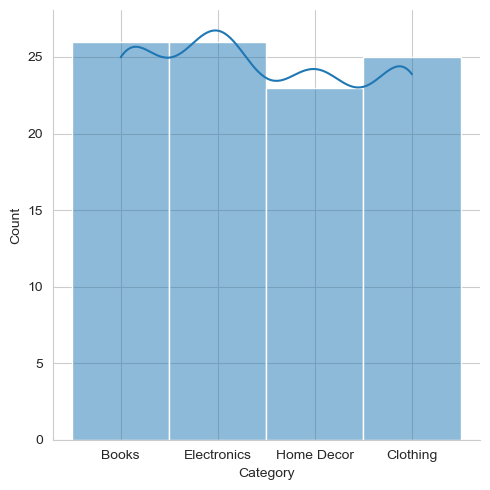

In [149]:
plt.figure(figsize=(15, 6))
sns.displot(df2['Category'], kde = True)
plt.show()

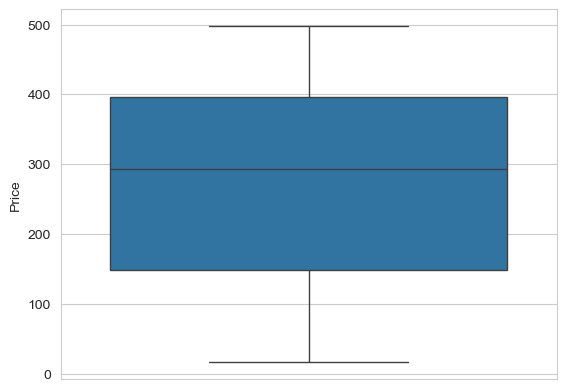

In [150]:
sns.boxplot(y = df2.Price)
plt.show()

<Axes: xlabel='Category', ylabel='Price'>

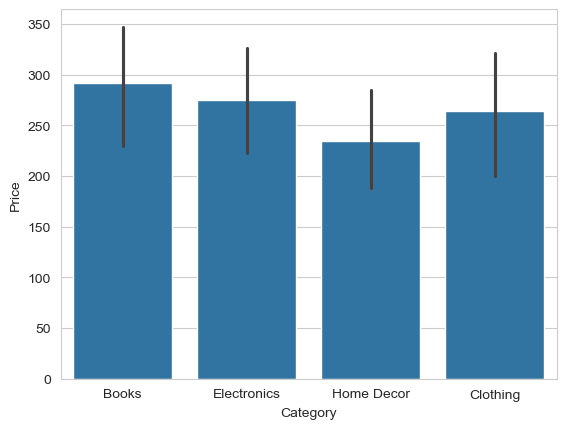

In [151]:
sns.barplot(x=df2.Category, y=df2.Price)

<Axes: xlabel='Category', ylabel='TotalValue'>

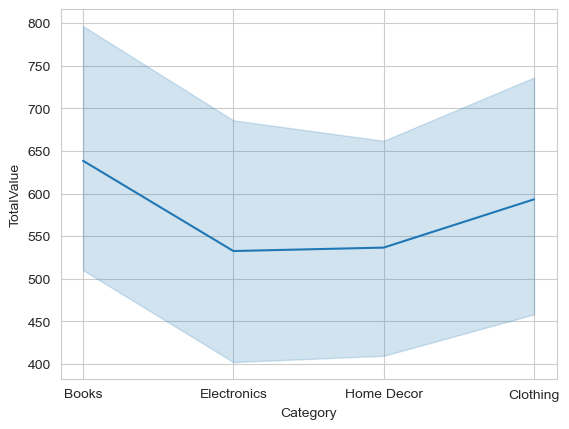

In [152]:
sns.lineplot(x=df2.Category , y = df3.TotalValue)

<Figure size 1500x600 with 0 Axes>

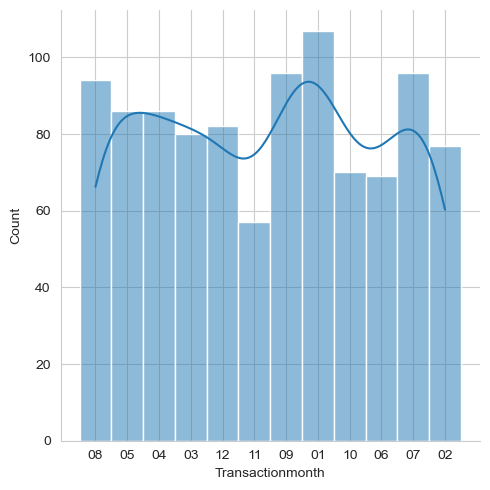

In [153]:
plt.figure(figsize=(15, 6))
sns.displot(df3['Transactionmonth'], kde = True)
plt.show()

In [154]:

df2_sorted = df2.groupby('Category')['Price'].sum()


df2_sorted = df2_sorted.sort_values(ascending=False)  


df2_sorted = df2_sorted.reset_index()


print(df2_sorted.head())

      Category    Price
0        Books  7597.52
1  Electronics  7159.19
2     Clothing  6593.00
3   Home Decor  5405.46


In [155]:
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

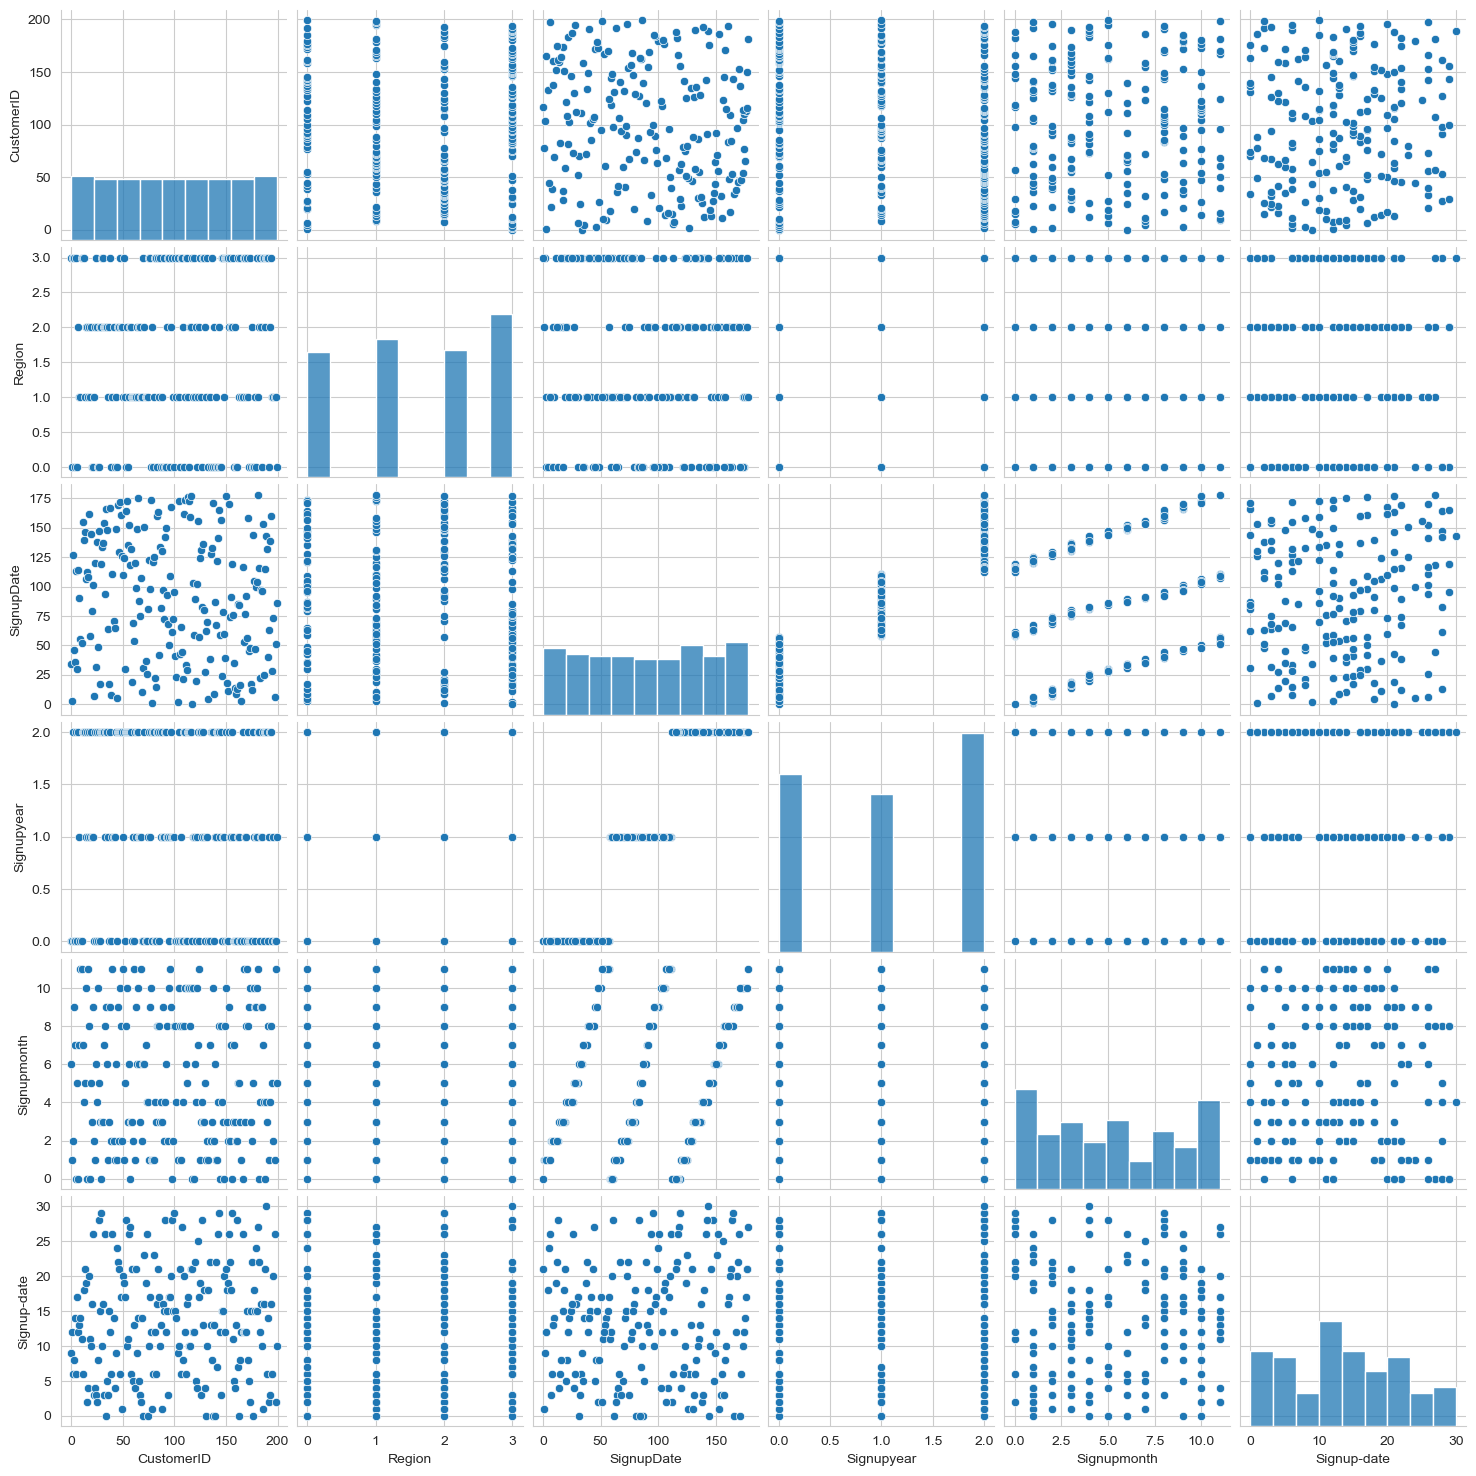

In [156]:
sns.pairplot(df1_transformed)

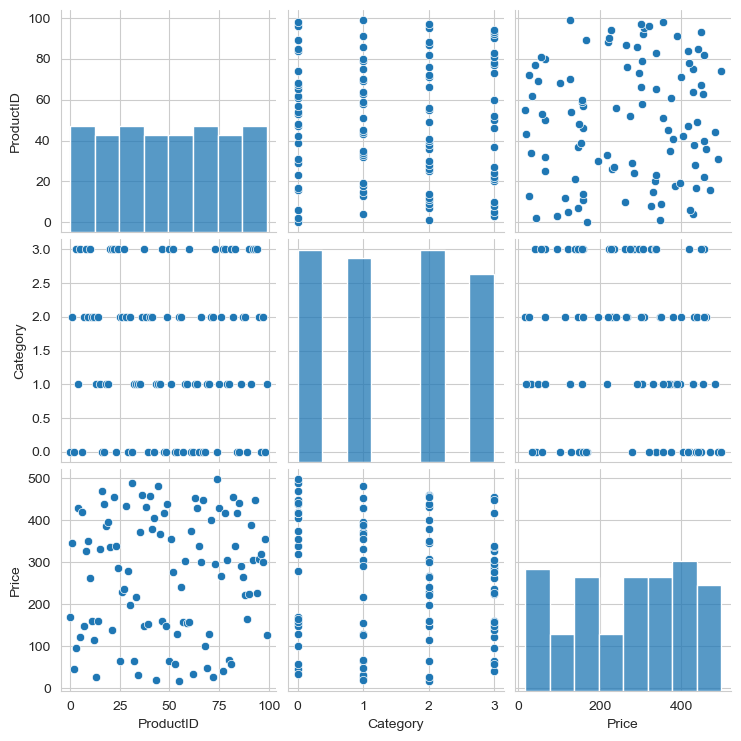

In [157]:
sns.pairplot(df2_transformed)

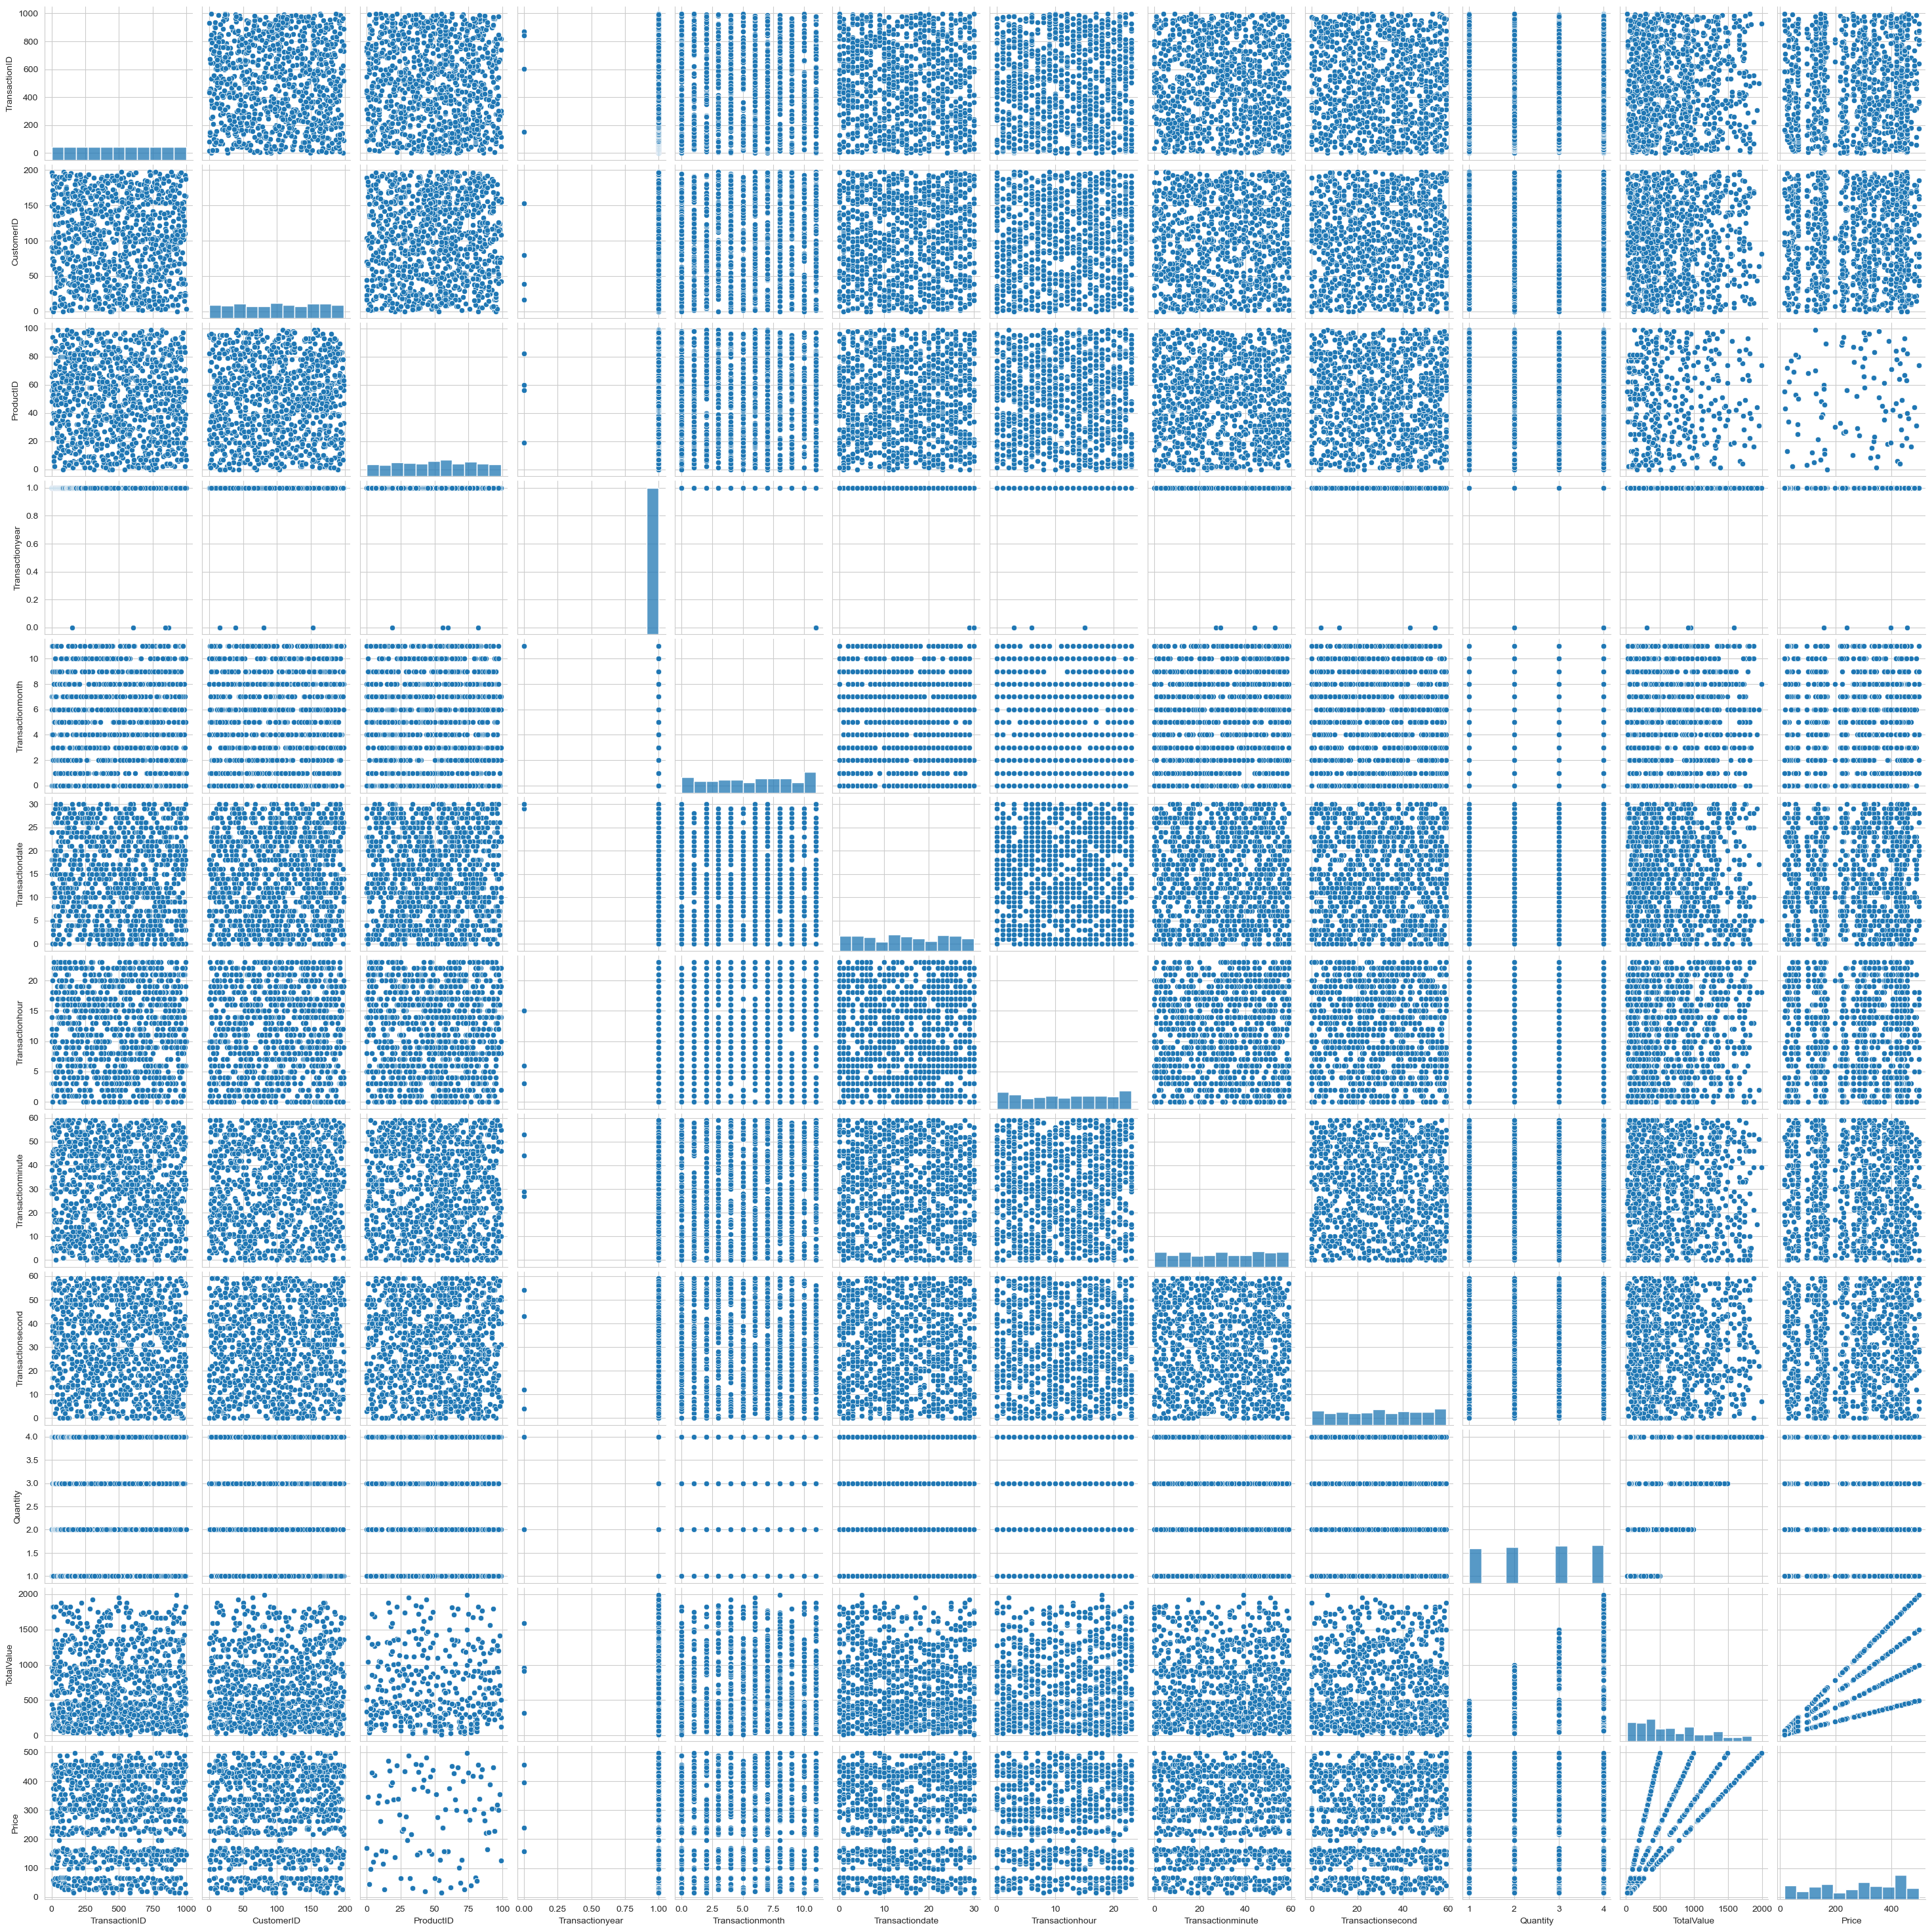

In [193]:
sns.pairplot(df3_transformed)

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
df3_transformed.head()

TransactionID  CustomerID  ProductID  Transactionyear  Transactionmonth  \
0              0         197         66                1                 7   
1            111         145         66                1                 4   
2            165         126         66                1                 3   
3            271          86         66                1                 2   
4            362          69         66                1                 2   

   Transactiondate  Transactionhour  Transactionminute  Transactionsecond  \
0               24               12                 38                 23   
1               26               22                 23                 54   
2               24                7                 38                 55   
3               25               22                 55                 37   
4               20               15                 10                 10   

   Quantity  TotalValue   Price  
0         1      300.68  300.68  
1         1      300.68  300.68  
2         1      300.68  300.68  
3         2      601.36  300.68  
4         3      902.04  300.68

In [197]:
X = df3_transformed.drop(columns=['Transactionyear', 'Transactionmonth','Transactiondate','Transactionminute','Transactionsecond','TotalValue','Price'])
y = df3[['TotalValue','Price']]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [199]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [200]:
X_train

array([[ 1.22660535,  0.11519126, -1.43058856, -1.52158072, -0.50377516],
       [ 1.35916177,  0.04467628, -1.03076525,  0.35107069,  0.40744606],
       [ 1.11149056, -1.64768335, -0.70363709,  1.21537135, -0.50377516],
       ...,
       [ 0.43824348, -0.96016225,  1.15008914,  1.35942146, -0.50377516],
       [-0.0536106 ,  1.50786221, -1.03076525,  1.21537135,  0.40744606],
       [-1.69312422,  1.06714355,  0.42313768, -1.23348051, -1.41499638]])

In [201]:
X_test

array([[ 0.63010146, -0.02583871, -1.5032837 ,  1.64752168,  1.31866728],
       [ 1.02428239, -0.30789864, -0.26746621,  1.64752168, -1.41499638],
       [ 1.43241663,  1.03188606, -0.26746621,  0.78322102,  1.31866728],
       ...,
       [-1.55359114, -0.07872494, -1.03076525, -0.94538029, -1.41499638],
       [ 0.13824738, -1.64768335,  0.60487554, -0.80133018, -1.41499638],
       [ 0.88474932, -0.80150353,  0.71391826,  1.35942146,  1.31866728]])

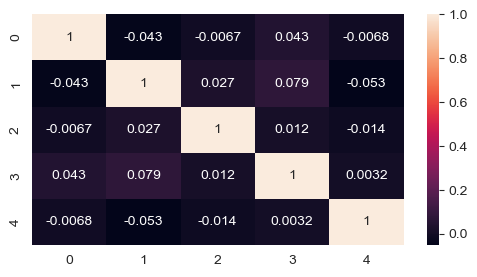

In [202]:
plt.figure(figsize=(6,3))
sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
plt.show()

In [203]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [204]:
coeff_df = pd.DataFrame(lin_reg.coef_, columns=X.columns).T
coeff_df

0         1
TransactionID     -7.238581 -1.514615
CustomerID        -0.170093  0.105536
ProductID          9.766302  5.004646
Transactionhour   36.879707  9.115708
Quantity         289.841493 -2.861432

In [205]:
lin_reg.intercept_

array([686.69044286, 270.2341    ])

In [206]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[1110.41688388,  272.99865816],
       [ 327.35175988,  286.37887963],
       [1084.62356187,  270.20120437],
       [ 761.32553209,  260.22954368],
       [ 808.87643236,  269.01259659],
       [1055.86704821,  259.10469461],
       [ 281.66047568,  276.52237032],
       [ 812.27355931,  269.72631274],
       [ 319.26406727,  287.63774528],
       [ 830.40783971,  275.15719008],
       [ 514.39823639,  261.63525333],
       [ 494.28556831,  257.07617547],
       [1074.56000105,  263.989686  ],
       [ 522.44927958,  266.88699109],
       [ 293.61370572,  274.98768472],
       [ 804.35307054,  267.41707665],
       [ 777.08703385,  263.671033  ],
       [ 490.54636101,  254.8813773 ],
       [ 748.58468529,  251.30053872],
       [ 760.98158042,  256.81464368],
       [ 763.49926073,  262.80907161],
       [ 778.38484513,  261.91414162],
       [ 807.88315486,  267.03671444],
       [ 841.78190722,  281.17953148],
       [1076.59080185,  268.67893701],
       [ 519.1312978 ,  2

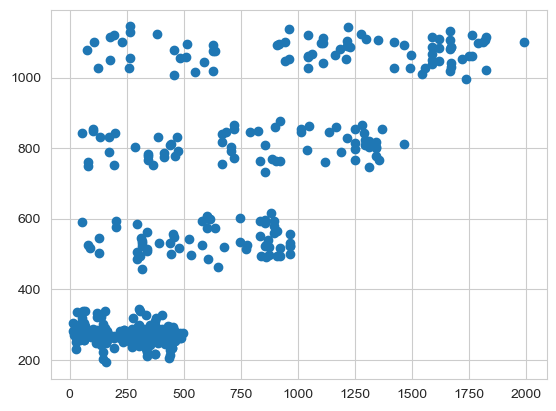

In [207]:
plt.scatter(y_test, y_pred)

<Axes: ylabel='Density'>

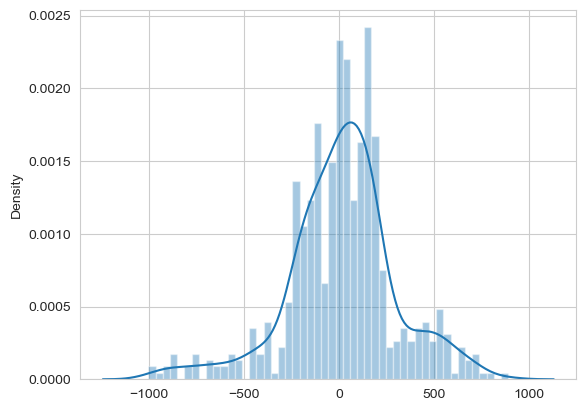

In [208]:
sns.distplot((y_test - y_pred), bins=50)

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [210]:
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score: ', r2_score(y_test, y_pred))

Mean absolute error:  207.90479534214077
Mean squared error:  82758.30724625422
Root Mean Squared Error:  287.6774361090112
r2 score:  0.2013844060744826


In [211]:
y_pred_train = lin_reg.predict(X_train)

In [212]:
print('Mean absolute error: ', mean_absolute_error(y_train, y_pred_train))
print('Mean squared error: ', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2 score: ', r2_score(y_train, y_pred_train))

Mean absolute error:  221.60933751856078
Mean squared error:  87224.33882458333
Root Mean Squared Error:  295.3376691595289
r2 score:  0.18128144178489453


In [213]:
results = [{'model' : 'Linear Regression',
           'MAE': mean_absolute_error(y_train, y_pred_train),
           'MSE': mean_squared_error(y_train, y_pred_train),
           'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)) ,
           'r2_score' : r2_score(y_train, y_pred_train)}]

In [214]:
results_df = pd.DataFrame(results)
results_df

model         MAE           MSE        RMSE  r2_score
0  Linear Regression  221.609338  87224.338825  295.337669  0.181281

In [215]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor()

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [216]:
print('Mean absolute error: ', mean_absolute_error(y_test, test_pred))
print('Mean squared error: ', mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, test_pred)))
print('r2 score: ', r2_score(y_test, test_pred))

Mean absolute error:  259.55317308237824
Mean squared error:  159383.34354094075
Root Mean Squared Error:  399.22843528604113
r2 score:  -0.4735446244258782


In [217]:
test_pred

array([[1666.98724812,  436.40081619],
       [  82.78944307,  145.80757063],
       [1645.77895987,  431.64486792],
       [1221.26718754,  388.66466242],
       [1130.26033189,  332.93632536],
       [1718.07762293,  463.97128811],
       [ 211.61971482,  217.13779374],
       [1116.90546168,  330.65288881],
       [ 126.40191541,  172.09030356],
       [1237.22742126,  393.75298594],
       [ 787.38327357,  336.7902586 ],
       [ 802.90384977,  346.61672907],
       [1776.63840007,  494.32716736],
       [ 647.73395626,  264.9550836 ],
       [  38.59217713,  116.17946839],
       [1129.81134624,  338.1139547 ],
       [1180.16615399,  363.53460406],
       [ 752.75458495,  318.75972865],
       [1322.42084518,  439.90625498],
       [1310.86200877,  440.79091093],
       [1325.12240887,  453.82666776],
       [1156.89887971,  352.73368988],
       [1274.20947081,  414.21620141],
       [1108.86783499,  327.25793202],
       [1811.07793153,  519.60280379],
       [ 682.23439334,  2

In [218]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)


pred_ridge_train = model_ridge.predict(X_train)
pred_ridge = model_ridge.predict(X_test)

In [219]:
print('Mean absolute error: ', mean_absolute_error(y_test, pred_ridge))
print('Mean squared error: ', mean_squared_error(y_test, pred_ridge))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred_ridge)))
print('r2 score: ', r2_score(y_test, pred_ridge))

Mean absolute error:  207.90327038353576
Mean squared error:  82762.96495382418
Root Mean Squared Error:  287.68553135989333
r2 score:  0.20137586375683958


In [220]:
print('Mean absolute error: ', mean_absolute_error(y_train, pred_ridge_train))
print('Mean squared error: ', mean_squared_error(y_train, pred_ridge_train))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, pred_ridge_train)))
print('r2 score: ', r2_score(y_train, pred_ridge_train))

Mean absolute error:  221.6131594580258
Mean squared error:  87224.42610551532
Root Mean Squared Error:  295.3378169241374
r2 score:  0.18128107227658047


In [221]:
results_ridge = [{'model' : 'Ridge Regression',
           'MAE': mean_absolute_error(y_train, pred_ridge_train),
           'MSE': mean_squared_error(y_train, pred_ridge_train),
           'RMSE': np.sqrt(mean_squared_error(y_train, pred_ridge_train)) ,
           'r2_score' : r2_score(y_train, pred_ridge_train)}]

results_ridge_df = pd.DataFrame(results_ridge)

results_df = pd.concat([results_df, results_ridge_df]).reset_index()
results_df

index              model         MAE           MSE        RMSE  r2_score
0      0  Linear Regression  221.609338  87224.338825  295.337669  0.181281
1      0   Ridge Regression  221.613159  87224.426106  295.337817  0.181281

In [222]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)


pred_lasso_train = model_lasso.predict(X_train)
pred_lasso = model_lasso.predict(X_test)

In [223]:
model_lasso.coef_

array([[ -6.19988408,  -0.        ,   8.76715834,  35.83650437,
        288.84711955],
       [ -0.47464392,   0.        ,   4.04015081,   8.08729002,
         -1.86992121]])

In [224]:
print('Mean absolute error: ', mean_absolute_error(y_test, pred_lasso))
print('Mean squared error: ', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred_lasso)))
print('r2 score: ', r2_score(y_test, pred_lasso))

Mean absolute error:  207.93080444538276
Mean squared error:  82689.00773702371
Root Mean Squared Error:  287.5569643340667
r2 score:  0.2028683076010963


In [225]:
print('Mean absolute error: ', mean_absolute_error(y_train, pred_lasso_train))
print('Mean squared error: ', mean_squared_error(y_train, pred_lasso_train))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, pred_lasso_train)))
print('r2 score: ', r2_score(y_train, pred_lasso_train))

Mean absolute error:  221.68659816652976
Mean squared error:  87228.41093189645
Root Mean Squared Error:  295.34456306473027
r2 score:  0.18117314063495454


In [226]:
results_lasso = [{'model' : 'Lasso Regression',
           'MAE': mean_absolute_error(y_train, pred_lasso_train),
           'MSE': mean_squared_error(y_train, pred_lasso_train),
           'RMSE': np.sqrt(mean_squared_error(y_train, pred_lasso_train)) ,
           'r2_score' : r2_score(y_train, pred_lasso_train)}]

results_lasso_df = pd.DataFrame(results_lasso)

results_df = pd.concat([results_df, results_lasso_df]).reset_index()
results_df

level_0  index              model         MAE           MSE        RMSE  \
0        0    0.0  Linear Regression  221.609338  87224.338825  295.337669   
1        1    0.0   Ridge Regression  221.613159  87224.426106  295.337817   
2        0    NaN   Lasso Regression  221.686598  87228.410932  295.344563   

   r2_score  
0  0.181281  
1  0.181281  
2  0.181173

In [228]:
results_df.to_csv(r"C:\Users\Shruti Sharma\OneDrive\Documents\lookalike_model.csv" , index = False)

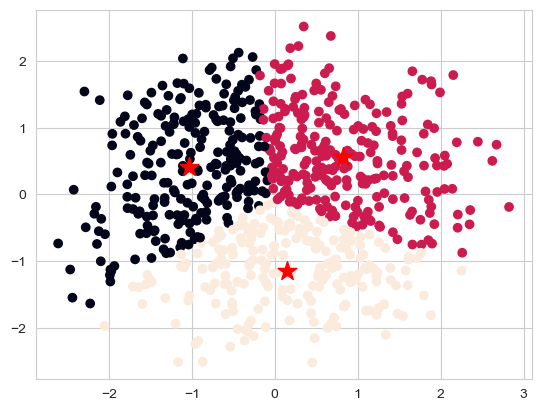

In [229]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)

labels = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', s=200)
plt.show()

In [230]:
import pandas as pd
import numpy as np

df = pd.DataFrame(labels, columns=['Cluster'])

df[['Feature1', 'Feature2']] = X_pca

print(df)

     Cluster  Feature1  Feature2
0          1  1.035986  0.269295
1          1  0.333454  1.496364
2          1  0.604547  1.814350
3          2 -0.046938 -0.356876
4          1  0.029738  0.473194
..       ...       ...       ...
695        0 -0.930961 -0.635918
696        2  0.179280 -1.887737
697        0 -0.545938  0.954199
698        0 -1.238246  0.606305
699        2 -0.868153 -2.504206

[700 rows x 3 columns]


In [231]:

from sklearn.cluster import DBSCAN

In [232]:
epsilon = 0.5
minPts = 10

In [233]:
dbscan = DBSCAN(eps=epsilon, min_samples=minPts)

<function matplotlib.pyplot.show(close=None, block=None)>

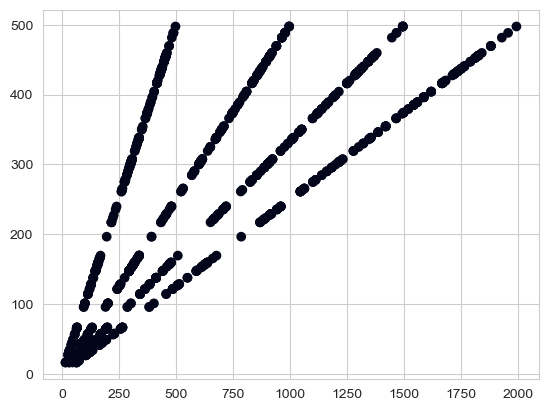

In [239]:

data = dbscan.fit(df3_transformed)


labels = dbscan.labels_

plt.scatter(df3_transformed['TotalValue'],df3_transformed['Price'],c=labels)
plt.show